# Kahn's Topoplogical sort algorithm

Kahn's algorithm produces a topological order of a provided directed acyclic graph (DAG). DAG's nodes are characterized by having incoming and outgoing degrees (because of being directed). The number of incoming edges/branches is called indegree, the number of leaving edges/branches from a node is called the outdegree. Nodes with an indegree of 0 do not depend on any other node in the graph. A node with indegree > 0 depends on the the node from which its incoming branch/es are originating. If a graph connects several nodes which all rely on a sequence of the included nodes because each node has in and out going edges/branches, this sequence of nodes is called a cycle. A DAG does not have such cycles. Kahn's algorithm orders the nodes in such a way, that the first node will have an indegree of 0 and the last node will have  an outdegree of 0. The topological order is ambiguous, meaning several runs of the algorithm can lead to several valid orders. 

The Kahn sort algorithm can be imagined as a representation of the morning routine. In order to leave the house one needs to get out of the bed first, getting dressed, eating breakfast, going to the bathroom and so on. Some of these actions require another one happening before, while some are not depending on other actions. In order to get all the morning routine steps done you need to leave the bed. However, it is up to you whether you brush your teeths before getting dressed. This kind of problems are addressed with the Kahn algorithm. In this case leaving the bed is a node with an indegree 0. Leaving the house is not leading to any other action in the morning routine and will be the last node in the order. The nodes between need to be unlocked by taking actions and remove dependencies. For example leaving the bed makes the options go to the bathroom,  get dressed or get breakfast available. If you go to the bathroom first then brushing teeth, going to the toilet and washing the face become available because the bathroom was entered on which these actions rely on. Note you could choose to eat breakfast or getting dressed first and got to the bathroom later. You even could go to the toilet first then have breakfast, then return to the bathroom for brushing teeth and washing the face and as last step before leaving the house getting dressed.

The Kahn algorithm handles these dependencies as follows: find all nodes with indegree 0 and add them to a queue. Pick the first queue element and add it as first element to the topological order. Then, delete the current node from the queue and the graph. Deletion from the graph results in lessening of the adjacent nodes indegree by 1. This reduction is due to the current nodes outgoing node is an incoming node for the adjacent nodes. This procedure of lessening the indegree of adjacent nodes eventually results in indegree of 0 for an adjacent node. If this is the case, add this node to the queue with nodes of indegree 0. If this is not the case continue without adding new elements to the queue with the second queue element. Again remove it from the queue and the graph. Check whether the indegree of adjacent nodes has reduced to 0 if so add it to the queue. This set of actions is repeated until the graoh does have nodes. While repeting these steps keep track of how often you repeat these steps, if you need to repeat the steps more often than there are nodes in the graph a cycle was encountered. In this case do not return the order but a statement, that a cycle was encountered.

In [3]:
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt

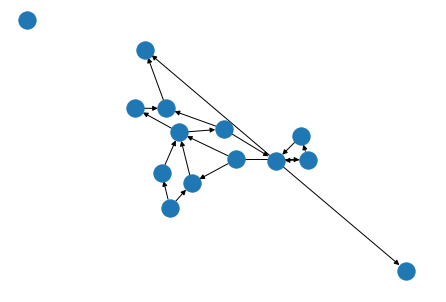

In [127]:
G1 = nx.DiGraph()
G1.add_node(13)
G1.add_edges_from([(0,2), (0,3), (0, 6), (1, 4), (2, 6), (3, 1), (3, 4), (4, 5), (4, 8), (6, 7), (6, 11), (7, 4), (7, 12), (9, 2), (9, 10), (10, 6), (11, 12), (12, 8)])
nx.draw(G1)

In [129]:
def Kahn_algorithm(Graph):
    # transcribe nodes and their indegrees into dictionary
    indegree_dict = dict(Graph.in_degree())

    # get a list of all nodes
    nodes = list(Graph.nodes)
    nr_nodes = len(nodes)
    
    # intitialize the topological order
    topological_order = []
    
    # as long as there are nodes run this loop
    while nodes:
        # loop through nodes and if the indegree of the current node is 0 do the following steps
        for node in nodes:
            print('current node:', node)
            if indegree_dict[node] == 0:
                
                # add it to the topological order and remove it from the nodes queue
                topological_order.append(node)
                nodes.remove(node)

                # find adjacent nodes
                adj_nodes = Graph.adj[node]
                
                # lessen the in degree of the adjacent nodes by 1
                for adj in adj_nodes:
                    indegree_dict[adj] = indegree_dict[adj] - 1
    
    if len(topological_order) == nr_nodes: # this statement will never end up in else because i remove nodes every step
        return topological_order
    else:
        print('Cycle was encountered')

In [130]:
Kahn_algorithm(G1)

current node: 13
current node: 2
current node: 3
current node: 6
current node: 1
current node: 4
current node: 5
current node: 8
current node: 7
current node: 11
current node: 12
current node: 9
current node: 0
current node: 3
current node: 1
current node: 5
current node: 8
current node: 7
current node: 11
current node: 12
current node: 10
current node: 2
current node: 4
current node: 5
current node: 8
current node: 7
current node: 11
current node: 12
current node: 6
current node: 5
current node: 8
current node: 7
current node: 12
current node: 4
current node: 8
current node: 11
current node: 5
current node: 12
current node: 8


[13, 9, 0, 3, 1, 10, 2, 6, 7, 4, 11, 5, 12, 8]

In [128]:
# transcribe nodes and their indegrees into dictionary
#indegree_dict = {node: indegree for (node, indegree) in G1.in_degree()}
indegree_dict = dict(G1.in_degree())
print('initital indegree dict', indegree_dict)

# get a list of all nodes
nodes = list(G1.nodes)
# initialize the queue
queue = []

# intitialize the topological order
topological_order = []

while nodes:
    print('-------------start of loop------------------')
    # add nodes with indegree 0 to queue
    for node in indegree_dict.keys():
        if indegree_dict[node] == 0:
            queue.append(node)
    
    # remove nodes with indegree 0 from the indegree dictionary and from the nodes list
    for node in queue:
        indegree_dict.pop(node)
        nodes.remove(node)
    
    # find adjacent nodes of the first queue item
    adj_nodes = G1.adj[queue[0]]
    
    # loop through adjacent nodes and lessen their indegree by 1
    for adj in adj_nodes:
        indegree_dict[adj] = indegree_dict[adj] - 1
    
    # add first queue item to the topological order
    topological_order.append(queue[0])
    
    # remove the first queue item from the queue
    queue.pop(0)
    
    print('----------------end of loop run--------------------')

initital indegree dict {13: 0, 0: 0, 2: 2, 3: 1, 6: 3, 1: 1, 4: 3, 5: 1, 8: 2, 7: 1, 11: 1, 12: 2, 9: 0, 10: 1}
-------------start of loop------------------
----------------end of loop run--------------------
-------------start of loop------------------


KeyError: 0